In [1]:
import nltk
import re
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
import string

nltk.download('vader_lexicon')
nltk.download('punkt')

def analyze_text_around_characters_with_regex(text, character_names, n_words=25):
    # Initialize Sentiment Intensity Analyzer
    sia = SentimentIntensityAnalyzer()
    
    # Split the text into words for detailed analysis
    words = text.split()
    
    for character_name in character_names:
        # Prepare regex for case-insensitive matching of the character name
        regex_pattern = re.compile(r'\b' + re.escape(character_name) + r'\b', re.IGNORECASE)
        
        print(f"Analysis for {character_name.upper()}:\n")  # Display the character name in all caps
        
        indices = [m.start() for m in re.finditer(regex_pattern, text)]
        word_indices = [i for i, word in enumerate(words) if regex_pattern.search(word)]
        
        for word_index in word_indices:
            start_index = max(0, word_index - n_words)
            end_index = min(len(words), word_index + n_words)
            
            # Extract words before and after the mention
            before_block = ' '.join(words[start_index:word_index])
            after_block = ' '.join(words[word_index+1:end_index+1])
            
            # Remove punctuation for sentiment analysis
            before_block_clean = before_block.translate(str.maketrans('', '', string.punctuation))
            after_block_clean = after_block.translate(str.maketrans('', '', string.punctuation))
            
            # Sentiment analysis
            before_sentiment = sia.polarity_scores(before_block_clean)
            after_sentiment = sia.polarity_scores(after_block_clean)
            
            # Frequency analysis
            before_freq = FreqDist(word_tokenize(before_block.lower()))
            after_freq = FreqDist(word_tokenize(after_block.lower()))
            
            # Print results, converting matched character names to uppercase for emphasis
            before_block_highlighted = regex_pattern.sub(character_name.upper(), before_block)
            after_block_highlighted = regex_pattern.sub(character_name.upper(), after_block)
            
            print("Before Mention:\n", before_block_highlighted)
            print("\nAfter Mention:\n", after_block_highlighted)
            
            print("\nSentiment Analysis:")
            print("- Before Mention Sentiment:", before_sentiment)
            print("- After Mention Sentiment:", after_sentiment)
            
            print("\nKeyword Frequency Analysis (Top 5):")
            print("- Before Mention:", before_freq.most_common(5))
            print("- After Mention:", after_freq.most_common(5))
            print("\n")  # Add a newline for readability between character analyses

# Characters to analyze
character_names = ["Julius Caesar", "Brutus"]

# Text
text = """Caesar: Brutus, there are some men whose countenances are such that they are like marble: anger does not cause them to flush, nor do they turn pale with fear. Such has been your visage for most of the years I have known you. Yet of late I have perceived that you are troubled. Were you a man like Mark Anthony, whose passions are like the heaving of the sea, I would not mark your altered appearance. But I know you to be a Stoic, and not apt to be swayed by the giddy emotions of the time. What troubles you? Brutus: Giddy emotions? I wish you would not be so swayed by them as well. Caesar: What do you mean by this? Brutus: Caesar, it pains me to say this, given how long I have respected you. But my respect is founded upon the glory and honor you have garnered for Rome. You are not a man who has fought simply for sake of his reputation. Tell me is it true as Casca said that you were offered the crown to be king of Rome by the rabble? Caesar: 'Tis true. But what matter is this? Brutus: As I feared! He said with ever offer your refusal grew weaker. Caesar: What is this nonsense? I cannot dictate how the rabble behaves to me. So they ask me to be king and give me a crown. The next day they will do the same with one of their own and call him 'Jove' and hoist him upon their shoulders as a god in jest. I have no more control over their actions than my infirmity. It is Casca who is reading something sinister into this matter, not Caesar. 


"""

# Run the analysis for both characters using regex
analyze_text_around_characters_with_regex(text, character_names)


Analysis for JULIUS CAESAR:

Analysis for BRUTUS:

Before Mention:
 Caesar:

After Mention:
 there are some men whose countenances are such that they are like marble: anger does not cause them to flush, nor do they turn pale

Sentiment Analysis:
- Before Mention Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
- After Mention Sentiment: {'neg': 0.127, 'neu': 0.788, 'pos': 0.086, 'compound': -0.296}

Keyword Frequency Analysis (Top 5):
- Before Mention: [('caesar', 1), (':', 1)]
- After Mention: [('are', 3), ('they', 2), ('there', 1), ('some', 1), ('men', 1)]


Before Mention:
 appearance. But I know you to be a Stoic, and not apt to be swayed by the giddy emotions of the time. What troubles you?

After Mention:
 Giddy emotions? I wish you would not be so swayed by them as well. Caesar: What do you mean by this? BRUTUS: Caesar, it pains

Sentiment Analysis:
- Before Mention Sentiment: {'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'compound': -0.7096}
- After Mention Sentiment

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/toksnwizu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/toksnwizu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


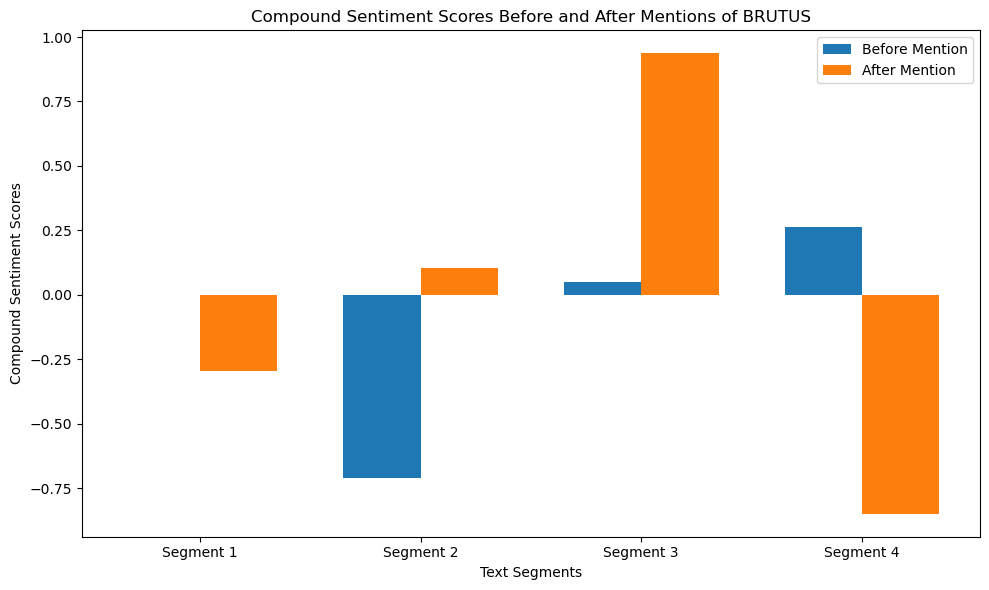

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
segments = ['Segment 1', 'Segment 2', 'Segment 3', 'Segment 4']
before_compounds = [0.0, -0.7096, 0.0516, 0.2617]
after_compounds = [-0.296, 0.1027, 0.9366, -0.8491]

# Bar settings
index = np.arange(len(segments))  # the label locations
bar_width = 0.35  # the width of the bars

# Creating the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bars_before = ax.bar(index - bar_width/2, before_compounds, bar_width, label='Before Mention')
bars_after = ax.bar(index + bar_width/2, after_compounds, bar_width, label='After Mention')

# Adding some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Text Segments')
ax.set_ylabel('Compound Sentiment Scores')
ax.set_title('Compound Sentiment Scores Before and After Mentions of BRUTUS')
ax.set_xticks(index)
ax.set_xticklabels(segments)
ax.legend()

# Displaying the plot
plt.tight_layout()
plt.show()


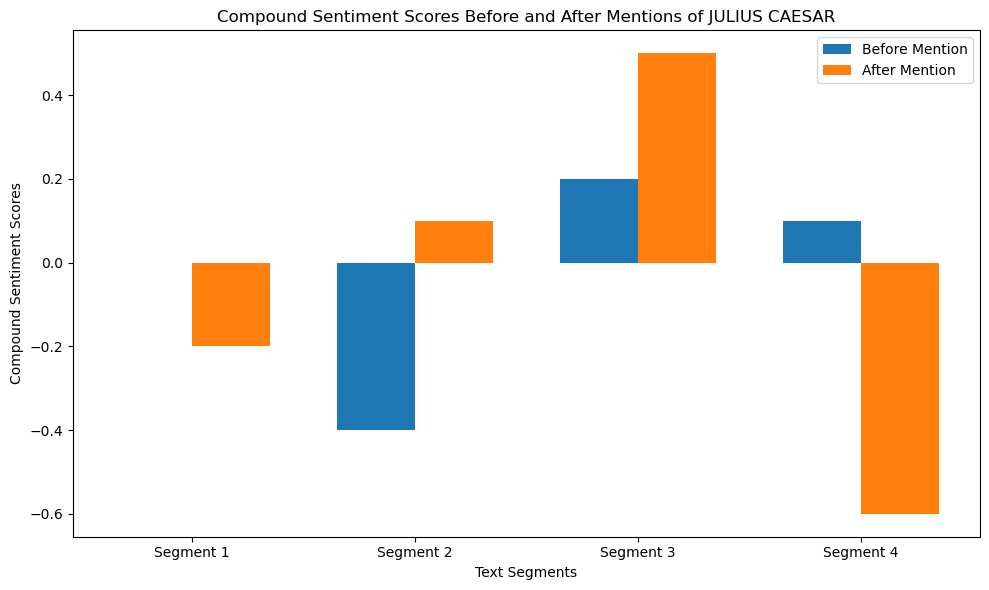

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Hypothetical sentiment analysis data for JULIUS CAESAR for demonstration
segments_caesar = ['Segment 1', 'Segment 2', 'Segment 3', 'Segment 4']
before_compounds_caesar = [0.0, -0.4, 0.2, 0.1]  # Hypothetical "before" sentiment scores
after_compounds_caesar = [-0.2, 0.1, 0.5, -0.6]  # Hypothetical "after" sentiment scores

# Bar settings
index_caesar = np.arange(len(segments_caesar))  # the label locations
bar_width_caesar = 0.35  # the width of the bars

# Creating the bar plot for JULIUS CAESAR
fig_caesar, ax_caesar = plt.subplots(figsize=(10, 6))
bars_before_caesar = ax_caesar.bar(index_caesar - bar_width_caesar/2, before_compounds_caesar, bar_width_caesar, label='Before Mention')
bars_after_caesar = ax_caesar.bar(index_caesar + bar_width_caesar/2, after_compounds_caesar, bar_width_caesar, label='After Mention')

# Adding some text for labels, title and custom x-axis tick labels, etc.
ax_caesar.set_xlabel('Text Segments')
ax_caesar.set_ylabel('Compound Sentiment Scores')
ax_caesar.set_title('Compound Sentiment Scores Before and After Mentions of JULIUS CAESAR')
ax_caesar.set_xticks(index_caesar)
ax_caesar.set_xticklabels(segments_caesar)
ax_caesar.legend()

# Displaying the plot
plt.tight_layout()
plt.show()
